# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise 1 | `Questions`

> For your further exercise, let's analyze a dataset about [TED talks](https://www.ted.com/talks) using `pandas` and `matplotlib` libraries.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import ast
import warnings

### <font color = "blue"> `IMPORT` your dataset: `ted.csv`. </font>

In [2]:
ted=pd.read_csv('ted.csv')

> #### Print the imported dataframe. Each row (data points) represents a single talk (unit of observation).

In [3]:
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

### Question 1. How would you check the number of rows and columns?

In [4]:
ted.shape

print(f'The number of rows is {ted.shape[0]}')
print(f'The number of columns is {ted.shape[1]}')

The number of rows is 2550
The number of columns is 17


> Note that `object columns` are usually `strings`, but can also be arbitrary Python objects such as `lists` and `dictionaries`.

> #### <font color = "red"> See **Chapter 12 and 13** of `The Coder's Apprentice` for more details. </font>

### Question 2. How would you count the number of missing values in each column?

In [5]:
ted.isnull().sum(axis=0)

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

### Question 3.1. Which talks give rise to the most online discussion? First, please sort by the number of first-level comments (though note that this is `biased in favor of older talks`).

In [6]:
ted.sort_values(by='comments',ascending=False,inplace=True)

In [7]:
print(f'The talk "{ted['name'][0]}" gave rise to the most online discussion.')

The talk "Ken Robinson: Do schools kill creativity?" gave rise to the most online discussion.


#### Question 3.2. Please `correct for the bias` in favor of older talks `by calculating the number of comments per view`.

In [8]:
ted['Comments_per_view']=ted['comments']/ted['views']
ted.sort_values(by='Comments_per_view',ascending=False,inplace=True)
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,Comments_per_view
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art edito

In [9]:
print(f'The talk "{ted['name'][0]}" gave rise to the most comments per view.')

The talk "Ken Robinson: Do schools kill creativity?" gave rise to the most comments per view.


> #### You will find that, for every view of the same-sex marriage talk, there are 0.002 comments.

#### Question 3.3. Please make this more interpretable by `inverting` the calculation.

In [10]:
ted['Views_for_every_comment']=ted['views']/ted['comments']
ted.sort_values(by='Views_for_every_comment',ascending=True,inplace=True)
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,Comments_per_view,Views_for_every_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1

> Please consider the `limitations` and `biases` of your data, making your results understandable (`interpretable`).

### <font color = "blue"> Let's `visualize` the distribution of comments </font>

> #### <font color = "red"> See **Chapter 4** of `Python Data Science Handbook` for a quick reference for matplotlib </font>

> #### <font color = "red"> For in-depth details, use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html </font>

#### Question 3.4. Please create a `Line chart`, but it seems NOT useful here.

In [11]:
ted.reset_index(drop=True,inplace=True)

<Axes: >

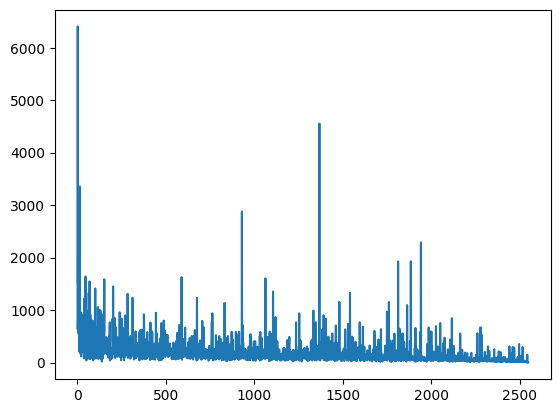

In [12]:
ted['comments'].plot(kind='line')

#### Question 3.5. Please create a `Histogram`--it displays the frequency distribution of a single numeric variable.

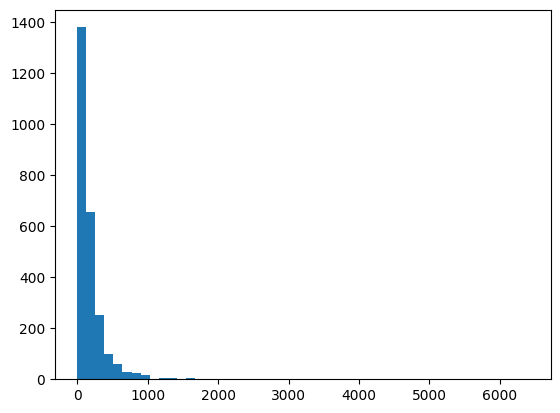

In [13]:
plt.hist(ted['comments'],bins=50);

#### Question 3.6. Please modify the plot to be more informative by setting a cut-off for inclusion (i.e., more than 1,000 comments).

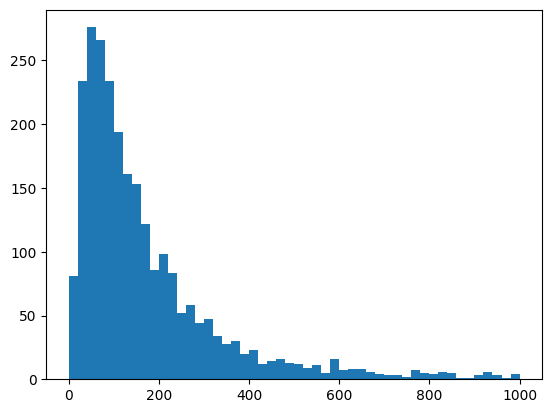

In [14]:
plt.hist(ted['comments'],bins=50,range=(0,1000));

>  Now, before we move on, let's check how many observations we removed from the plot.

In [15]:
len(ted[ted['comments'] >1000 ])

31

### Question 4.1. Here's a question for an expansion of your vocabulary: please obtain the above using the query method.

> #### <font color = "red"> Please check the following for more details </font> 
> - `Python Data Science Handbook`
    - *Chapter 3*: Data Manipulation with Pandas
        - *Section 12*: High-Performance Pandas: `eval()` and `query()` 

In [16]:
result=len(ted.query('comments>1000'))
result

31

#### Question 4.2. Here's a question for yet another expansion of your vocabulary: please write this using the `loc` accessor.

> #### <font color = "red"> Please check the following for more details on the differences between loc and iloc. 
    
> - `** NOTE: You may ignore ix as it has been deprecated**` </font>

> - `Python Data Science Handbook`
    - *Chapter 3*: Data Manipulation with Pandas
        - *Section 2*: Data Indexing and Selection
            - *Subsection 3*: Indexers: loc, iloc, and ix

In [17]:
(ted.loc[:,'comments']>1000).sum()

np.int64(31)

> Let's increase the number of bins (intervals) to see more detail.

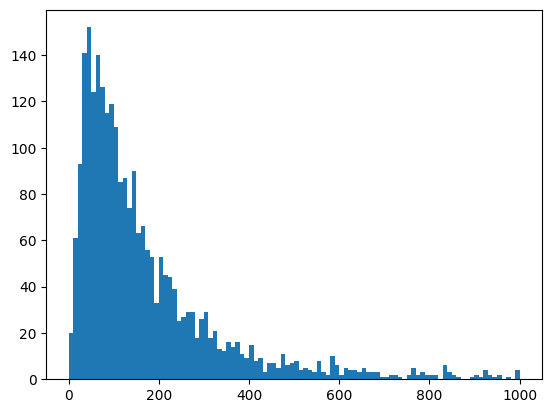

In [18]:
plt.hist(ted['comments'],range=(0,1000),bins=100);

#### Question 4.3. Please create a boxplot. Boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers.

<Axes: >

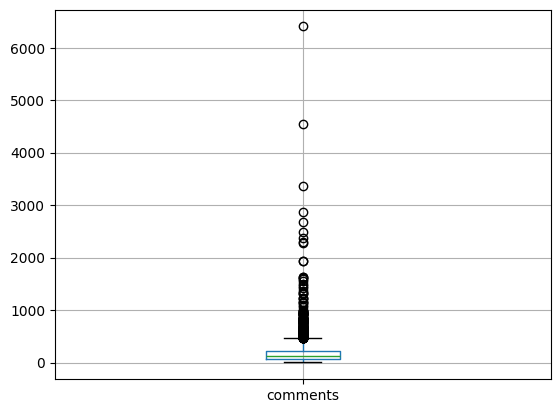

In [19]:
ted.boxplot(column='comments')

### <font color = "blue"> Let me reiterate learning pointers in an explicit manner so that you can keep this in mind. </font>

1. `Choose your plot type` based on the question you are answering and the data type(s) you are working with
2. `Use pandas one-liners` to iterate through plots quickly
3. `Try modifying the plot defaults`

> ***Yes, creating plots involves your decision-making***

#### Question 4.4. Please plot the number of talks that took place each year.

> Let's calculate the average delay between filming and publishing.

In [20]:
ted['delay']=ted['published_date']-ted['film_date']

> Okay. `event` column does not always include the year

In [21]:
ted['event']

0       New York State Senate
1              TEDGlobal 2010
2                     TED2002
3                     TED2010
4                     TED2011
                ...          
2545                  TED2017
2546              TEDxHamburg
2547           TEDGlobal 2017
2548                   TEDNYC
2549                TEDxSkoll
Name: event, Length: 2550, dtype: object

> Note that `film_date` denotes `Unix timestamp of the filming`. Have a look at it :)

In [22]:
ted['film_date']

0       1259712000
1       1279065600
2       1012608000
3       1265760000
4       1299110400
           ...    
2545    1492992000
2546    1465344000
2547    1503792000
2548    1488931200
2549    1491523200
Name: film_date, Length: 2550, dtype: int64

> Results don't look right...

> What would you do? You may use `to_datetime()`

In [23]:
pd.to_datetime(ted['film_date'])

0      1970-01-01 00:00:01.259712000
1      1970-01-01 00:00:01.279065600
2      1970-01-01 00:00:01.012608000
3      1970-01-01 00:00:01.265760000
4      1970-01-01 00:00:01.299110400
                    ...             
2545   1970-01-01 00:00:01.492992000
2546   1970-01-01 00:00:01.465344000
2547   1970-01-01 00:00:01.503792000
2548   1970-01-01 00:00:01.488931200
2549   1970-01-01 00:00:01.491523200
Name: film_date, Length: 2550, dtype: datetime64[ns]

> Still, it does NOT look fine...

### <font color = "red"> For your information, [pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) </font>

> #### <font color = "blue"> Please use argument `unit` and set it at `"s"` </font>

In [24]:
ted['published_date'] = pd.to_datetime(ted['published_date'],unit='s')
ted['film_date'] = pd.to_datetime(ted['film_date'],unit='s')

> You might want to check that event name matches film_datetime for a random sample: use, `sample()`

In [25]:
ted.sample(n=5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,Comments_per_view,Views_for_every_comment,delay
1397,119,What do science and play have in common? Neuro...,925,TEDGlobal 2012,2012-06-26,28,Beau Lotto + Amy O'Toole,Beau Lotto + Amy O'Toole: Science is for every...,2,2012-10-17 15:13:19,"[{'id': 3, 'name': 'Courageous', 'count': 134}...","[{'id': 1320, 'hero': 'https://pe.tedcdn.com/i...","Neuroscientist, Artist","['bees', 'biology', 'brain', 'children', 'cogn...","Science is for everyone, kids included",https://www.ted.com/talks/beau_lotto_amy_o_too...,1272319,0.000094,10691.756303,9817999
2111,82,Unlock the mysteries and inner workings of the...,1024,TEDxOslo,2015-01-29,25,Roger Antonsen,Roger Antonsen: Math is the hidden secret to u...,1,2016-11-18 16:00:08,"[{'id': 7, 'name': 'Funny', 'count': 239}, {'i...","[{'id': 2237, 'hero': 'https://pe.tedcdn.com/i...","Logician, mathematician, computer scientist","['TEDx', 'art', 'beauty', 'communication', 'ed...",Math is the hidden secret to understanding the...,https://www.ted.com/talks/roger_antonsen_math_...,1910593,0.000043,23299.914634,56995208
414,93,"Long conflict can wreck a country, leaving beh...",994,TED@State,2009-06-06,28,Paul Collier,Paul Collier: New rules for rebuilding a broke...,1,2009-06-24 01:00:00,"[{'id': 8, 'name': 'Informative', 'count': 162...","[{'id': 270, 'hero': 'https://pe.tedcdn.com/im...",Economist,"['global issues', 'money', 'politics', 'povert...",New rules for rebuilding a broken nation,https://www.ted.com/talks/paul_collier_s_new_r...,406530,0.000229,4371.290323,1558800
873,50,Greg Lynn talks about the mathematical roots o...,1134,TED2005,2005-02-02,19,Greg Lynn,Greg Lynn: Organic algorithms in architecture,1,2009-01-09 08:00:00,"[{'id': 21, 'name': 'Unconvincing', 'count': 3...","[{'id': 31, 'hero': 'https://pe.tedcdn.com/ima...",Designer,['design'],Organic algorithms in architecture,https://www.ted.com/talks/greg_lynn_on_organic...,346702,0.000144,6934.040000,124185600
2156,43,"Nature is wonderfully abundant, diverse and my...",759,TEDxKC,2016-08-19,20,Alejandro Sánchez Alvarado,Alejandro Sánchez Alvarado: To solve old probl...,1,2017-01-12 16:07:48,"[{'id': 1, 'name': 'Beautiful', 'count': 118},...","[{'id': 206, 'hero': 'https://pe.tedcdn.com/im...",Developmental and regeneration biologist,"['TEDx', 'animals', 'beauty', 'biodiversity', ...","To solve old problems, study new species",https://www.ted.com/talks/alejandro_sanchez_al...,1059199,0.000041,24632.534884,12672468


> New column uses the datetime data type (this was an automatic conversion)

##### `datetime` columns have convenient attributes under the `dt` namespace

In [26]:
ted['published_date'].dt.hour

0       16
1        8
2        2
3        9
4       23
        ..
2545    14
2546    20
2547    15
2548    14
2549    20
Name: published_date, Length: 2550, dtype: int32

> This is similar to string methods under the str namespace

> Let's count the number of talks each year using value_counts()

In [27]:
ted['film_date'].dt.year.value_counts()

film_date
2011    270
2013    270
2012    267
2010    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1984      1
1994      1
1991      1
1983      1
1972      1
1990      1
Name: count, dtype: int64

##### Let's visualize.

<Axes: xlabel='film_date'>

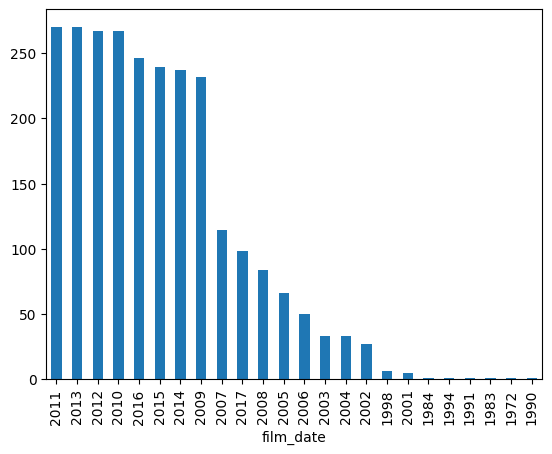

In [28]:
ted['film_date'].dt.year.value_counts().plot(kind='bar')

> points are plotted and connected in the order you give them to pandas

#### Question 4.5. Please sort the index before plotting

In [29]:
plot4_5=ted['name'].groupby(ted['film_date'].dt.year).aggregate("count")

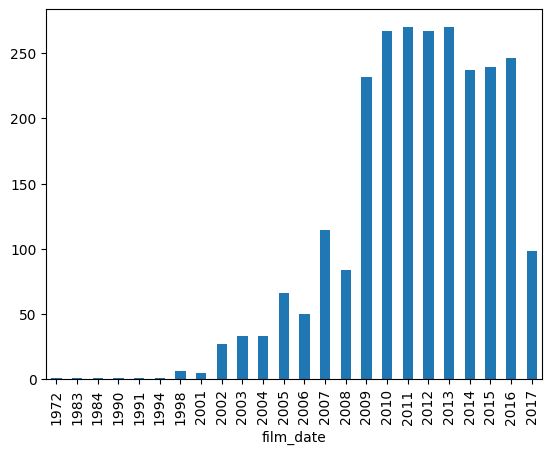

In [30]:
plot4_5.plot(kind='bar');

> Check your data to understand more about what this means :)

> Do note that we only have partial data for 2017

Before we move forward, please consider the following:

- Read the documentation of your dataset
- Use the datetime data type for dates and times
- Check your work as you proceed
- Exclude data if it might not be relevant to your focal point of analysis

### Question 5.1. What were the "best" events in TED talks' history to attend? Let's count the number of talks (great if you value variety, but they may not be great talks)

In [31]:
Events=ted.groupby('event')['title'].count().sort_values(ascending = False)
Events

event
TED2014                   84
TED2009                   83
TED2013                   77
TED2016                   77
TED2015                   75
                          ..
TEDxEQChCh                 1
TEDxEastEnd                1
TEDxEdmonton               1
TEDxEuston                 1
World Science Festival     1
Name: title, Length: 355, dtype: int64

In [32]:
print (f'The best event in TED talks history to attend is {Events.index[0]}')

The best event in TED talks history to attend is TED2014


#### Question 5.2. Let's use `views` as a proxy for `quality of talk`

In [33]:
Views=ted.groupby('event')['views'].aggregate(func="sum").sort_values(ascending = False)
Views

event
TED2013                   177307937
TED2014                   174121423
TEDGlobal 2013            170554736
TED2015                   150826305
TED2006                   147345533
                            ...    
TEDxNASA@SiliconValley       155895
AORN Congress                149818
TEDxWaterloo                 138812
TEDxIslay                    120274
The Do Lectures              112321
Name: views, Length: 355, dtype: int64

In [34]:
print (f'The best event in TED talks history to attend based on number of views is {Views.index[0]}')

The best event in TED talks history to attend based on number of views is TED2013


#### Question 5.3. Let's find the largest values, but we don't know how many talks are being averaged

In [35]:
print (f'The largest number of views is {Views[0]} for the event {Views.index[0]}')

The largest number of views is 177307937 for the event TED2013


/var/folders/9f/g6tpsc8n5qb861y9f7rpwlcm0000gn/T/ipykernel_4664/566439703.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print (f'The largest number of views is {Views[0]} for the event {Views.index[0]}')


#### Question 5.4. Let's show the number of talks along with the mean (events with the highest means had only 1 or 2 talks)

In [36]:
Views = Views.to_frame()
Events = Events.to_frame()

In [37]:
A5_4=Views.merge(Events,how="inner",left_index=True, right_index=True)

In [38]:
A5_4["average_views"]=A5_4["views"]/A5_4["title"]

In [39]:
A5_4

,views,title,average_views
event,,,
TED2013,177307937,77,2.302700e+06
TED2014,174121423,84,2.072874e+06
TEDGlobal 2013,170554736,66,2.584163e+06
TED2015,150826305,75,2.011017e+06
TED2006,147345533,45,3.274345e+06
...,...,...,...
TEDxNASA@SiliconValley,155895,1,1.558950e+05
AORN Congress,149818,1,1.498180e+05
TEDxWaterloo,138812,1,1.388120e+05


#### Question 5.5. Let's calculate the total views per event

In [40]:
Views

,views
event,
TED2013,177307937
TED2014,174121423
TEDGlobal 2013,170554736
TED2015,150826305
TED2006,147345533
...,...
TEDxNASA@SiliconValley,155895
AORN Congress,149818
TEDxWaterloo,138812


> #### <font color = "blue"> As you have seen, please... </font>

- Think creatively for how you can use the data you have to answer your question
- Watch out for small sample sizes

### Now, let's take a look at ratings data

> Previously, users could tag talks on the TED website (funny, inspiring, confusing, etc.)

In [41]:
ted['ratings']

0       [{'id': 25, 'name': 'OK', 'count': 100}, {'id'...
1       [{'id': 25, 'name': 'OK', 'count': 111}, {'id'...
2       [{'id': 3, 'name': 'Courageous', 'count': 3236...
3       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
4       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
                              ...                        
2545    [{'id': 1, 'name': 'Beautiful', 'count': 7}, {...
2546    [{'id': 9, 'name': 'Ingenious', 'count': 16}, ...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 41}, ...
2548    [{'id': 7, 'name': 'Funny', 'count': 10}, {'id...
2549    [{'id': 10, 'name': 'Inspiring', 'count': 46},...
Name: ratings, Length: 2550, dtype: object

> Think about two ways to examine the ratings data for the first talk

In [42]:
ted['ratings'][0]

"[{'id': 25, 'name': 'OK', 'count': 100}, {'id': 23, 'name': 'Jaw-dropping', 'count': 95}, {'id': 24, 'name': 'Persuasive', 'count': 777}, {'id': 3, 'name': 'Courageous', 'count': 502}, {'id': 21, 'name': 'Unconvincing', 'count': 88}, {'id': 10, 'name': 'Inspiring', 'count': 694}, {'id': 1, 'name': 'Beautiful', 'count': 241}, {'id': 7, 'name': 'Funny', 'count': 98}, {'id': 8, 'name': 'Informative', 'count': 140}, {'id': 9, 'name': 'Ingenious', 'count': 59}, {'id': 11, 'name': 'Longwinded', 'count': 22}, {'id': 26, 'name': 'Obnoxious', 'count': 43}, {'id': 2, 'name': 'Confusing', 'count': 14}, {'id': 22, 'name': 'Fascinating', 'count': 46}]"

In [43]:
ted['ratings'].head(1)

0    [{'id': 25, 'name': 'OK', 'count': 100}, {'id'...
Name: ratings, dtype: object

> Okay, this is a string not a list.

In [44]:
type(ted["ratings"][0])

str

### Let's convert this into something useful using Python's `ast` module (`Abstract Syntax Tree`)

> `literal_eval()` allows you to evaluate a string containing a Python literal or container

> #### <font color = "red"> See below for my guidance </font>

```python
# if you wish to unpack data
    YOUR_DF["variable"].apply(ast.literal_eval)

# if you wish to access specific talk related data
    YOUR_DF["variable"].apply(ast.literal_eval)[0]

# if you wish to access specific talk related observations within the data
    YOUR_DF["variable"].apply(ast.literal_eval)[0][0]

# if you wish to access specific talk related observations with a particular attribute within the data
    YOUR_DF["variable"].apply(ast.literal_eval)[0][0]["key"]
```

> If you have a string representation of something, you can retrieve what it actually represents

In [45]:
ted["ratings"].apply(ast.literal_eval)

0       [{'id': 25, 'name': 'OK', 'count': 100}, {'id'...
1       [{'id': 25, 'name': 'OK', 'count': 111}, {'id'...
2       [{'id': 3, 'name': 'Courageous', 'count': 3236...
3       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
4       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
                              ...                        
2545    [{'id': 1, 'name': 'Beautiful', 'count': 7}, {...
2546    [{'id': 9, 'name': 'Ingenious', 'count': 16}, ...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 41}, ...
2548    [{'id': 7, 'name': 'Funny', 'count': 10}, {'id...
2549    [{'id': 10, 'name': 'Inspiring', 'count': 46},...
Name: ratings, Length: 2550, dtype: object

> Let's unpack the ratings data for the first talk

In [46]:
ted["ratings"].apply(ast.literal_eval)[0]

[{'id': 25, 'name': 'OK', 'count': 100},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 95},
 {'id': 24, 'name': 'Persuasive', 'count': 777},
 {'id': 3, 'name': 'Courageous', 'count': 502},
 {'id': 21, 'name': 'Unconvincing', 'count': 88},
 {'id': 10, 'name': 'Inspiring', 'count': 694},
 {'id': 1, 'name': 'Beautiful', 'count': 241},
 {'id': 7, 'name': 'Funny', 'count': 98},
 {'id': 8, 'name': 'Informative', 'count': 140},
 {'id': 9, 'name': 'Ingenious', 'count': 59},
 {'id': 11, 'name': 'Longwinded', 'count': 22},
 {'id': 26, 'name': 'Obnoxious', 'count': 43},
 {'id': 2, 'name': 'Confusing', 'count': 14},
 {'id': 22, 'name': 'Fascinating', 'count': 46}]

> Yes, now we have a list (of dictionaries)

### Question 6. Let's define a function to convert an element in the ratings Series from string to list

#### <font color = "blue"> USE `ast.literal_eval()` </font>

In [47]:
def string_to_list(element_in_series):
    return ast.literal_eval(element_in_series)

> Let's test our function

In [48]:
string_to_list(ted["ratings"][0])

[{'id': 25, 'name': 'OK', 'count': 100},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 95},
 {'id': 24, 'name': 'Persuasive', 'count': 777},
 {'id': 3, 'name': 'Courageous', 'count': 502},
 {'id': 21, 'name': 'Unconvincing', 'count': 88},
 {'id': 10, 'name': 'Inspiring', 'count': 694},
 {'id': 1, 'name': 'Beautiful', 'count': 241},
 {'id': 7, 'name': 'Funny', 'count': 98},
 {'id': 8, 'name': 'Informative', 'count': 140},
 {'id': 9, 'name': 'Ingenious', 'count': 59},
 {'id': 11, 'name': 'Longwinded', 'count': 22},
 {'id': 26, 'name': 'Obnoxious', 'count': 43},
 {'id': 2, 'name': 'Confusing', 'count': 14},
 {'id': 22, 'name': 'Fascinating', 'count': 46}]

> Note that Series `apply` method applies a function to every element in a Series, returning a Series.

In [49]:
type(ted["ratings"].apply(ast.literal_eval))

pandas.core.series.Series

> #### <font color = "blue"> `lambda` is a shorter alternative</blue>

> #### <font color = "red">Please check the following for more details</font>
> - `Coder's Apprentice`
    - *Chapter 8*: Functions
        - *Section 6*: Anonymous functions

In [50]:
ted["ratings"].apply(lambda x: ast.literal_eval(x))

0       [{'id': 25, 'name': 'OK', 'count': 100}, {'id'...
1       [{'id': 25, 'name': 'OK', 'count': 111}, {'id'...
2       [{'id': 3, 'name': 'Courageous', 'count': 3236...
3       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
4       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
                              ...                        
2545    [{'id': 1, 'name': 'Beautiful', 'count': 7}, {...
2546    [{'id': 9, 'name': 'Ingenious', 'count': 16}, ...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 41}, ...
2548    [{'id': 7, 'name': 'Funny', 'count': 10}, {'id...
2549    [{'id': 10, 'name': 'Inspiring', 'count': 46},...
Name: ratings, Length: 2550, dtype: object

In [51]:
ted["ratings"]

0       [{'id': 25, 'name': 'OK', 'count': 100}, {'id'...
1       [{'id': 25, 'name': 'OK', 'count': 111}, {'id'...
2       [{'id': 3, 'name': 'Courageous', 'count': 3236...
3       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
4       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
                              ...                        
2545    [{'id': 1, 'name': 'Beautiful', 'count': 7}, {...
2546    [{'id': 9, 'name': 'Ingenious', 'count': 16}, ...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 41}, ...
2548    [{'id': 7, 'name': 'Funny', 'count': 10}, {'id...
2549    [{'id': 10, 'name': 'Inspiring', 'count': 46},...
Name: ratings, Length: 2550, dtype: object

> An even shorter alternative is to apply the function directly (without lambda)

In [52]:
ratings = ted["ratings"].apply(ast.literal_eval)

> Let's check that the new Series looks as expected

In [53]:
ratings

0       [{'id': 25, 'name': 'OK', 'count': 100}, {'id'...
1       [{'id': 25, 'name': 'OK', 'count': 111}, {'id'...
2       [{'id': 3, 'name': 'Courageous', 'count': 3236...
3       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
4       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
                              ...                        
2545    [{'id': 1, 'name': 'Beautiful', 'count': 7}, {...
2546    [{'id': 9, 'name': 'Ingenious', 'count': 16}, ...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 41}, ...
2548    [{'id': 7, 'name': 'Funny', 'count': 10}, {'id...
2549    [{'id': 10, 'name': 'Inspiring', 'count': 46},...
Name: ratings, Length: 2550, dtype: object

> Each element in the Series is a list

In [54]:
ted["ratings"].apply(ast.literal_eval).apply(type)

0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
2545    <class 'list'>
2546    <class 'list'>
2547    <class 'list'>
2548    <class 'list'>
2549    <class 'list'>
Name: ratings, Length: 2550, dtype: object

In [55]:
type(ted["ratings"][0])

str

> data type of the new Series is object

##### Note that object is not just for strings.

In [56]:
ted["ratings"].apply(ast.literal_eval).dtype

dtype('O')

In [57]:
type(ted["ratings"][0])

str

#### <font color = "blue"> So far so good, remember to: </font>

- Pay attention to data types in pandas
- Use apply any time it is necessary

### Question 7.1. Let's have a look at the total number of ratings received by each talk

- for each talk, calculate the percentage of ratings that were negative

- for each talk, calculate the average number of ratings it received per day since it was published

> Let's start by building a simple function

> Here, expected result (for each talk) is sum of count

In [58]:
type(ted["ratings"][0])

str

In [59]:
def sum_of_count(talk):

     ted["number_ratings"] = np.nan
     list_ratings = []
     for rating in talk:
          list_ratings.append(sum(item["count"] for item in rating))
          
     ted["number_ratings"] = list_ratings

In [60]:
sum_of_count(ratings)

In [61]:
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,Comments_per_view,Views_for_every_comment,delay,number_ratings
0,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,2009-12-02,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,2010-08-17 16:23:00,...,"[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587,22350180,2919
1,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,2010-07-14,36,David Bismark,David Bismark: E-voting without fraud,1,2010-11-02 08:14:00,...,"[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808,9620040,1845
2,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,2002-02-02,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,2007-04-16 02:07:00,...,"[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291,164081220,14904
3,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,2010-02-10,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,2010-05-26 09:26:00,...,"[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818,9105960,1896
4,2492,Janet Echelman found her true voice as an arti...,566,TED2011,2011-03-03,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,2011-06-07 23:36:00,...,"[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682,8379360,4158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,2017-04-24,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,2017-07-25 14:53:04,...,"[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286,8002384,236
2546,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,2016-06-08,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,2017-08-31 20:00:31,...,"[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667,38865631,68
2547,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,2017-09-15 15:08:13,...,"[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000,1696093,181
2548,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,2017-03-08,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,2017-08-03 14:24:04,...,"[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,h

#### Question 7.2. Please pass it a list, and it returns the first element in the list, which is a dictionary

In [62]:
# 0 is the first element

def list_dictionary(x):
    return x[0]

In [63]:
list_dictionary(ratings[0])

{'id': 25, 'name': 'OK', 'count': 100}

#### Question 7.3. Let's modify the function to return the vote count.

In [64]:
# First element, key is "count", returns the value

def list_dictionary_count(x):
    return x[0]['count']

In [65]:
list_dictionary_count(ratings[0])

100

#### Quesion 7.4. Let's pass it a list, and it returns a value from the first dictionary in the list

In [66]:
# Returns values from the dictionary

def list_dictionary_value(x):
    return x[0].values()

In [67]:
list_dictionary_value(ratings[0])

dict_values([25, 'OK', 100])

#### Question 7.5. Let's modify the function to get the sum of count

In [68]:
# Sums all the counts in the multiple dictionaries in the list

def list_counts(x):
    return sum([item["count"] for item in x])

In [69]:
list_counts(ratings[0])

2919

> Does the result look about right? Please check.

In [70]:
ted["number_ratings"][0]== list_counts(ratings[0])

np.True_

> Let's apply it to every element in the Series

In [71]:
type(ted["ratings"][0])

str

In [72]:
ted["ratings"]=ted["ratings"].apply(ast.literal_eval)

In [73]:
type(ted["ratings"][0])

list

In [74]:
ted["number_ratings"] = ted["ratings"].apply(list_counts)

In [75]:
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,Comments_per_view,Views_for_every_comment,delay,number_ratings
0,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,2009-12-02,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,2010-08-17 16:23:00,...,"[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587,22350180,2919
1,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,2010-07-14,36,David Bismark,David Bismark: E-voting without fraud,1,2010-11-02 08:14:00,...,"[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808,9620040,1845
2,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,2002-02-02,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,2007-04-16 02:07:00,...,"[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291,164081220,14904
3,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,2010-02-10,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,2010-05-26 09:26:00,...,"[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818,9105960,1896
4,2492,Janet Echelman found her true voice as an arti...,566,TED2011,2011-03-03,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,2011-06-07 23:36:00,...,"[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682,8379360,4158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,2017-04-24,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,2017-07-25 14:53:04,...,"[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286,8002384,236
2546,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,2016-06-08,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,2017-08-31 20:00:31,...,"[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667,38865631,68
2547,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,2017-09-15 15:08:13,...,"[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000,1696093,181
2548,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,2017-03-08,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,2017-08-03 14:24:04,...,"[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,h

> #### <font color = "blue"> Alternative here is to use a `generator expression`</font>

> #### <font color = "red"> Please check the following for more details </font>
> - `Think Python`: https://greenteapress.com/thinkpython2/thinkpython2.pdf
    - *Chapter 19*: The Goodies
        - *Section 3*: Generator expressions

In [76]:
result = (sum(dict["count"] for dict in element) for element in ted["ratings"])

for value in result:
    print(value)

2919
1845
14904
1896
4158
6338
783
2756
5629
1199
602
1223
2278
3908
9129
2031
1975
1427
1670
2413
1975
767
1123
2140
1074
2193
3219
1131
1621
1630
3983
2959
1931
894
1393
1573
585
561
592
6673
1328
2304
652
1442
2642
1132
4105
3019
721
2094
2393
307
907
1389
779
2168
4967
3145
1777
563
1871
1436
4312
677
5708
6680
1586
2080
1855
5119
632
866
1561
4532
654
572
857
841
2424
1926
1531
1782
4293
3779
2262
1904
2066
577
3703
631
3893
1944
3706
1629
3740
522
650
2879
825
1912
1416
6355
2676
2493
797
2236
1157
1421
6859
2169
1614
2464
3440
3421
209
1396
4998
1493
812
1064
808
1086
719
505
1308
4878
5884
541
2410
1831
4717
2440
638
1708
6362
662
844
3048
154
4519
996
2643
805
3393
1466
2847
3970
1645
1542
2420
6234
2954
7393
896
1413
581
2415
1163
1397
671
2942
1461
770
841
3067
1448
1377
2035
1626
1354
909
1286
1106
281
3883
980
2128
895
879
4165
4189
2031
3520
5724
657
2523
1483
847
903
1408
499
667
1340
785
1657
832
1359
396
5730
3104
3843
3819
7697
1025
2104
1549
2000
2367
808
1532
3946
2

> Try to use `lambda` to apply this method

In [77]:
ted["ratings"].apply(lambda ratings : sum((dict["count"] for dict in ratings)))

0        2919
1        1845
2       14904
3        1896
4        4158
        ...  
2545      236
2546       68
2547      181
2548       97
2549      221
Name: ratings, Length: 2550, dtype: int64

> Another alternative is to use `pd.DataFrame()`

> use `lambda` to apply this method

> Things to consider:

- Write your code in small chunks

- Check your work as you move forward

- `lambda` is best for simple functions

### Let's find: 
#### ***which occupations deliver the funniest TED talks on average?***

- for each talk, calculate the most frequent rating
- for each talk, clean the occupation data so that there's only one occupation per talk

##### You might want to count the number of funny ratings

In [78]:
funny_ratings_holder = []
for line in ted["ratings"]:
    funny_count = 0
    for dct in line:
        if isinstance(dct,dict):
            if "Funny" in dct["name"]:
                funny_ratings_holder.append(dct["count"])
                funny_count = 1
    if funny_count == 0:
        funny_ratings_holder.append(0)
        
ted["funny_ratings"] = funny_ratings_holder

In [79]:
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,Comments_per_view,Views_for_every_comment,delay,number_ratings,funny_ratings
0,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,2009-12-02,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,2010-08-17 16:23:00,...,Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587,22350180,2919,98
1,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,2010-07-14,36,David Bismark,David Bismark: E-voting without fraud,1,2010-11-02 08:14:00,...,Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808,9620040,1845,1
2,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,2002-02-02,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,2007-04-16 02:07:00,...,Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291,164081220,14904,1203
3,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,2010-02-10,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,2010-05-26 09:26:00,...,Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818,9105960,1896,5
4,2492,Janet Echelman found her true voice as an arti...,566,TED2011,2011-03-03,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,2011-06-07 23:36:00,...,Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682,8379360,4158,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,2017-04-24,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,2017-07-25 14:53:04,...,Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286,8002384,236,3
2546,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,2016-06-08,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,2017-08-31 20:00:31,...,Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667,38865631,68,0
2547,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,2017-09-15 15:08:13,...,Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000,1696093,181,6
2548,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,2017-03-08,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,2017-08-03 14:24:04,...,Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.com/talks/francoise_mouly_the_...,839040,0.000004,279680.000000,12839044,97,10


> "Funny" is not always the first dictionary in the list.

#### Please check ratings (not ratings_list) to see if "Funny" is always a rating type

In [80]:
ratings

0       [{'id': 25, 'name': 'OK', 'count': 100}, {'id'...
1       [{'id': 25, 'name': 'OK', 'count': 111}, {'id'...
2       [{'id': 3, 'name': 'Courageous', 'count': 3236...
3       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
4       [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
                              ...                        
2545    [{'id': 1, 'name': 'Beautiful', 'count': 7}, {...
2546    [{'id': 9, 'name': 'Ingenious', 'count': 16}, ...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 41}, ...
2548    [{'id': 7, 'name': 'Funny', 'count': 10}, {'id...
2549    [{'id': 10, 'name': 'Inspiring', 'count': 46},...
Name: ratings, Length: 2550, dtype: object

In [81]:
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,Comments_per_view,Views_for_every_comment,delay,number_ratings,funny_ratings
0,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,2009-12-02,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,2010-08-17 16:23:00,...,Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587,22350180,2919,98
1,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,2010-07-14,36,David Bismark,David Bismark: E-voting without fraud,1,2010-11-02 08:14:00,...,Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808,9620040,1845,1
2,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,2002-02-02,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,2007-04-16 02:07:00,...,Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291,164081220,14904,1203
3,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,2010-02-10,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,2010-05-26 09:26:00,...,Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818,9105960,1896,5
4,2492,Janet Echelman found her true voice as an arti...,566,TED2011,2011-03-03,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,2011-06-07 23:36:00,...,Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682,8379360,4158,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,2017-04-24,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,2017-07-25 14:53:04,...,Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286,8002384,236,3
2546,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,2016-06-08,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,2017-08-31 20:00:31,...,Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667,38865631,68,0
2547,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,2017-09-15 15:08:13,...,Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000,1696093,181,6
2548,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,2017-03-08,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,2017-08-03 14:24:04,...,Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.com/talks/francoise_mouly_the_...,839040,0.000004,279680.000000,12839044,97,10


### Question 8. Let's write a custom function that gives us a `dictionary` that lists `talks` containing `funny` rating.

In [82]:
def funny_talks(dataframe):
    funny_talks_dict={}
    
    for row in range(len(dataframe)):
        index_name = ted.iloc[row,:].name
        talk_name = ted.loc[index_name,"name"]
        talk_ratings = ted.loc[index_name,"ratings"]
        for rating in talk_ratings:
            if rating["name"] == "Funny":
                funny_talks_dict[talk_name] = "Funny"
    return funny_talks_dict

In [83]:
funny=funny_talks(ted)
funny

{'Diane J. Savino: The case for same-sex marriage': 'Funny',
 'David Bismark: E-voting without fraud': 'Funny',
 'Richard Dawkins: Militant atheism': 'Funny',
 'Sharmeen Obaid-Chinoy: Inside a school for suicide bombers': 'Funny',
 'Janet Echelman: Taking imagination seriously': 'Funny',
 'Lesley Hazleton: On reading the Koran': 'Funny',
 "Elizabeth Lindsey: Curating humanity's heritage": 'Funny',
 'David Chalmers: How do you explain consciousness?': 'Funny',
 'Michael Specter: The danger of science denial': 'Funny',
 'Mallika Sarabhai: Dance to change the world': 'Funny',
 'David Birch: A new way to stop identity theft': 'Funny',
 'Al Gore: What comes after An Inconvenient Truth?': 'Funny',
 'Naif Al-Mutawa: Superheroes inspired by Islam': 'Funny',
 'Garth Lenz: The true cost of oil': 'Funny',
 'Sam Harris: Science can answer moral questions': 'Funny',
 'Hanna Rosin: New data on the rise of women': 'Funny',
 'Tom Honey: Why would God create a tsunami?': 'Funny',
 'Carvens Lissaint: "P

> Then, you might want to examine a record in which "Funny" is not the first dictionary

In [84]:
def if_funny_in_first_dct(dataframe):
    
    for row in range(len(dataframe)):
        index_name = dataframe.iloc[row,:].name
        talk_name = dataframe.loc[index_name,"name"]
        talk_ratings = dataframe.loc[index_name,"ratings"]
        
        if "Funny" not in talk_ratings[0]["name"]:
            print(f"Funny is not in the first dictionary for {talk_name}")

> Let's check that the function works.

In [85]:
if_funny_in_first_dct(ted)

Funny is not in the first dictionary for Diane J. Savino: The case for same-sex marriage
Funny is not in the first dictionary for David Bismark: E-voting without fraud
Funny is not in the first dictionary for Richard Dawkins: Militant atheism
Funny is not in the first dictionary for Sharmeen Obaid-Chinoy: Inside a school for suicide bombers
Funny is not in the first dictionary for Janet Echelman: Taking imagination seriously
Funny is not in the first dictionary for Lesley Hazleton: On reading the Koran
Funny is not in the first dictionary for Elizabeth Lindsey: Curating humanity's heritage
Funny is not in the first dictionary for David Chalmers: How do you explain consciousness?
Funny is not in the first dictionary for Michael Specter: The danger of science denial
Funny is not in the first dictionary for Mallika Sarabhai: Dance to change the world
Funny is not in the first dictionary for David Birch: A new way to stop identity theft
Funny is not in the first dictionary for Al Gore: Wha

> Let's apply it to every element in the Series.

In [86]:
if_funny_in_first_dct(ted)

Funny is not in the first dictionary for Diane J. Savino: The case for same-sex marriage
Funny is not in the first dictionary for David Bismark: E-voting without fraud
Funny is not in the first dictionary for Richard Dawkins: Militant atheism
Funny is not in the first dictionary for Sharmeen Obaid-Chinoy: Inside a school for suicide bombers
Funny is not in the first dictionary for Janet Echelman: Taking imagination seriously
Funny is not in the first dictionary for Lesley Hazleton: On reading the Koran
Funny is not in the first dictionary for Elizabeth Lindsey: Curating humanity's heritage
Funny is not in the first dictionary for David Chalmers: How do you explain consciousness?
Funny is not in the first dictionary for Michael Specter: The danger of science denial
Funny is not in the first dictionary for Mallika Sarabhai: Dance to change the world
Funny is not in the first dictionary for David Birch: A new way to stop identity theft
Funny is not in the first dictionary for Al Gore: Wha

> Do check for `missing values`.

In [87]:
ted["ratings"].isna().sum()

np.int64(0)

##### Now, let's calculate the percentage of ratings that are funny

In [88]:
ted["percentage_funny"]=ted["funny_ratings"]/ted["number_ratings"]

> Let's do some "gut check" here that this calculation makes sense by examining the occupations of the funniest talks

In [89]:
ted.sort_values("percentage_funny",ascending=False)[["speaker_occupation", "percentage_funny"]]

,speaker_occupation,percentage_funny
1708,"Actor, comedian, playwright",0.702076
2392,Comedian,0.669927
1814,Comedian,0.630677
1627,Investor,0.629662
2543,Comedian and writer,0.625182
...,...,...
674,HIV/AIDS fighter,0.000000
671,Data Commons Advocate,0.000000
475,Biologist,0.000000
619,Space activist,0.000000


> Let's examine the occupations of the least funny talks.

In [90]:
ted.sort_values("percentage_funny",ascending=True)[["speaker_occupation", "percentage_funny"]]

,speaker_occupation,percentage_funny
969,Planetary explorer,0.000000
912,Cardiologist,0.000000
2480,Mental health advocate,0.000000
1323,Biomedical engineer,0.000000
475,Biologist,0.000000
...,...,...
2543,Comedian and writer,0.625182
1627,Investor,0.629662
1814,Comedian,0.630677
2392,Comedian,0.669927


### Question 9. It would be funny (pun inteded here) to analyze the funny rate by occupation :) Let's calculate the mean funny rate for each job.

In [91]:
ted.groupby(by="speaker_occupation")["percentage_funny"].aggregate(func="mean").sort_values(ascending=False)

speaker_occupation
Comedian and writer                    0.602085
Jugglers                               0.566828
Actor, comedian, playwright            0.558107
Actor, writer                          0.515152
Comedian                               0.512457
                                         ...   
Labor-rights activist                  0.000000
Political scientist and journalist     0.000000
Kenyan MP                              0.000000
Author, thinker                        0.000000
 Chairman of the Cordoba Initiative    0.000000
Name: percentage_funny, Length: 1458, dtype: float64

##### Note that most of the occupations have a sample size of 1

In [92]:
ted["speaker_occupation"].value_counts()

speaker_occupation
Writer                       45
Designer                     34
Artist                       34
Journalist                   33
Entrepreneur                 31
                             ..
Language                      1
Business strategist           1
Food writer                   1
Politician, data activist     1
Art editor                    1
Name: count, Length: 1458, dtype: int64

### Question 10. Let's start looking at `occupations` that are well-represented in the dataset. Let's count how many times each job appears

In [93]:
ted["speaker_occupation"].value_counts()

speaker_occupation
Writer                       45
Designer                     34
Artist                       34
Journalist                   33
Entrepreneur                 31
                             ..
Language                      1
Business strategist           1
Food writer                   1
Politician, data activist     1
Art editor                    1
Name: count, Length: 1458, dtype: int64

##### `value_counts()` outputs a pandas Series, thus we can use pandas to manipulate the output

In [94]:
ted["speaker_occupation"].value_counts()

speaker_occupation
Writer                       45
Designer                     34
Artist                       34
Journalist                   33
Entrepreneur                 31
                             ..
Language                      1
Business strategist           1
Food writer                   1
Politician, data activist     1
Art editor                    1
Name: count, Length: 1458, dtype: int64

##### Let's take a look at jobs which appear at least 5 times

In [95]:
jobs = ted["speaker_occupation"].value_counts()

common_jobs = jobs[jobs >= 5]

common_jobs

speaker_occupation
Writer                        45
Designer                      34
Artist                        34
Journalist                    33
Entrepreneur                  31
                              ..
Sound consultant               5
Violinist                      5
Science writer                 5
Game designer                  5
Environmentalist, futurist     5
Name: count, Length: 68, dtype: int64

> Let's save the index of this Series

In [96]:
common_jobs_list=list(common_jobs.index)

common_jobs_list

['Writer',
 'Designer',
 'Artist',
 'Journalist',
 'Entrepreneur',
 'Architect',
 'Inventor',
 'Psychologist',
 'Photographer',
 'Filmmaker',
 'Economist',
 'Neuroscientist',
 'Educator',
 'Author',
 'Roboticist',
 'Philosopher',
 'Biologist',
 'Physicist',
 'Musician',
 'Marine biologist',
 'Activist',
 'Global health expert; data visionary',
 'Technologist',
 'Singer/songwriter',
 'Historian',
 'Astronomer',
 'Oceanographer',
 'Behavioral economist',
 'Graphic designer',
 'Poet',
 'Philanthropist',
 'Novelist',
 'Social psychologist',
 'Computer scientist',
 'Engineer',
 'Futurist',
 'Mathematician',
 'Astrophysicist',
 'Evolutionary biologist',
 'Singer-songwriter',
 'Legal activist',
 'Climate advocate',
 'Comedian',
 'Performance poet, multimedia artist',
 'Writer, activist',
 'Social entrepreneur',
 'Techno-illusionist',
 'Reporter',
 'Photojournalist',
 'Physician',
 'Tech visionary',
 'Cartoonist',
 'Chemist',
 'Surgeon',
 'Paleontologist',
 'Sculptor',
 'Data scientist',
 'Mus

##### Now, re-analyze the funny rate by occupation (for top jobs only)

> Let's filter DataFrame to include only those jobs.

In [97]:
mask = ted["speaker_occupation"].isin(common_jobs_list)

In [98]:
ted_common_jobs=ted[mask]

In [99]:
ted_common_jobs

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,Comments_per_view,Views_for_every_comment,delay,number_ratings,funny_ratings,percentage_funny
2,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,2002-02-02,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,2007-04-16 02:07:00,...,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291,164081220,14904,1203,0.080717
3,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,2010-02-10,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,2010-05-26 09:26:00,...,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818,9105960,1896,5,0.002637
4,2492,Janet Echelman found her true voice as an arti...,566,TED2011,2011-03-03,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,2011-06-07 23:36:00,...,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682,8379360,4158,16,0.003848
7,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,2014-03-18,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,2014-07-14 15:08:04,...,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764,0.001236,809.114852,10249684,2756,16,0.005806
8,2272,"Vaccine-autism claims, ""Frankenfood"" bans, the...",1141,TED2010,2010-02-11,31,Michael Specter,Michael Specter: The danger of science denial,1,2010-04-12 09:38:00,...,"['global issues', 'medicine', 'religion', 'sci...",The danger of science denial,https://www.ted.com/talks/michael_specter_the_...,1838628,0.001236,809.255282,5218680,5629,76,0.013502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,8,"Underneath every shiny new megacity, there's o...",723,TEDGlobal 2017,2017-08-27,4,OluTimehin Adegbeye,OluTimehin Adegbeye: Who belongs in a city?,1,2017-09-08 14:51:06,...,"['Africa', 'activism', 'cities', 'government',...",Who belongs in a city?,https://www.ted.com/talks/olutimehin_adegbeye_...,707788,0.000011,88473.500000,1090266,431,19,0.044084
2533,7,"Each year, one in seven large corporations com...",808,TEDxZurich,2016-11-11,1,Alexander Wagner,Alexander Wagner: What really motivates people...,1,2017-09-12 20:00:51,...,"['TEDx', 'business', 'corruption', 'economics'...",What really motivates people to be honest in b...,https://www.ted.com/talks/alexander_wagner_wha...,621431,0.000011,88775.857143,26424051,231,5,0.021645
2535,10,Rhiannon Giddens pours the emotional weight of...,885,TED2016,2016-02-15,8,Rhiannon Giddens,Rhiannon Giddens: Songs that bring history to ...,1,2017-06-02 10:54:17,...,"['history', 'live music', 'music']",Songs that bring history to life,https://www.ted.com/talks/rhiannon_giddens_3_s...,946815,0.000011,94681.500000,40906457,334,5,0.014970
2547,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,2017-09-15 15:08:13,...,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000,1696093,181,6,0.033149


##### Let's re-do the previous groupby

In [100]:
ted_common_jobs.groupby(by="speaker_occupation")["percentage_funny"].aggregate(func="mean").sort_values(ascending=False)

speaker_occupation
Comedian                                      0.512457
Performance poet, multimedia artist           0.306468
Singer/songwriter                             0.252205
Producer                                      0.202531
Data scientist                                0.184076
                                                ...   
Photographer                                  0.007152
Investor and advocate for moral leadership    0.005198
Photojournalist                               0.004908
Physician                                     0.004515
Surgeon                                       0.002465
Name: percentage_funny, Length: 68, dtype: float64

> ### <font color = "blue"> Please consider the following, when using `pandas`: </font>

- Check your assumptions about your data
- Check whether your results are reasonable
- Take advantage of the fact that pandas operations often output a DataFrame or a Series
- Watch out for small sample sizes
- Consider the impact of missing data

> ### <font color = "blue"> As you could find from me as well as from the dataset, `data scientists are relatively funny` :) </font>


### <font color="green">"Thank you for putting your efforts into the exercise problem sets 😊"</font>